In [239]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt
from scipy import signal

In [240]:
music_sheet = cv.imread('C:/Users/ADmin/Desktop/drum/music_sheet/'+'/6.jpg',0)
_,music_sheet_bi = cv.threshold(music_sheet,0, 1, cv.THRESH_BINARY+cv.THRESH_OTSU)

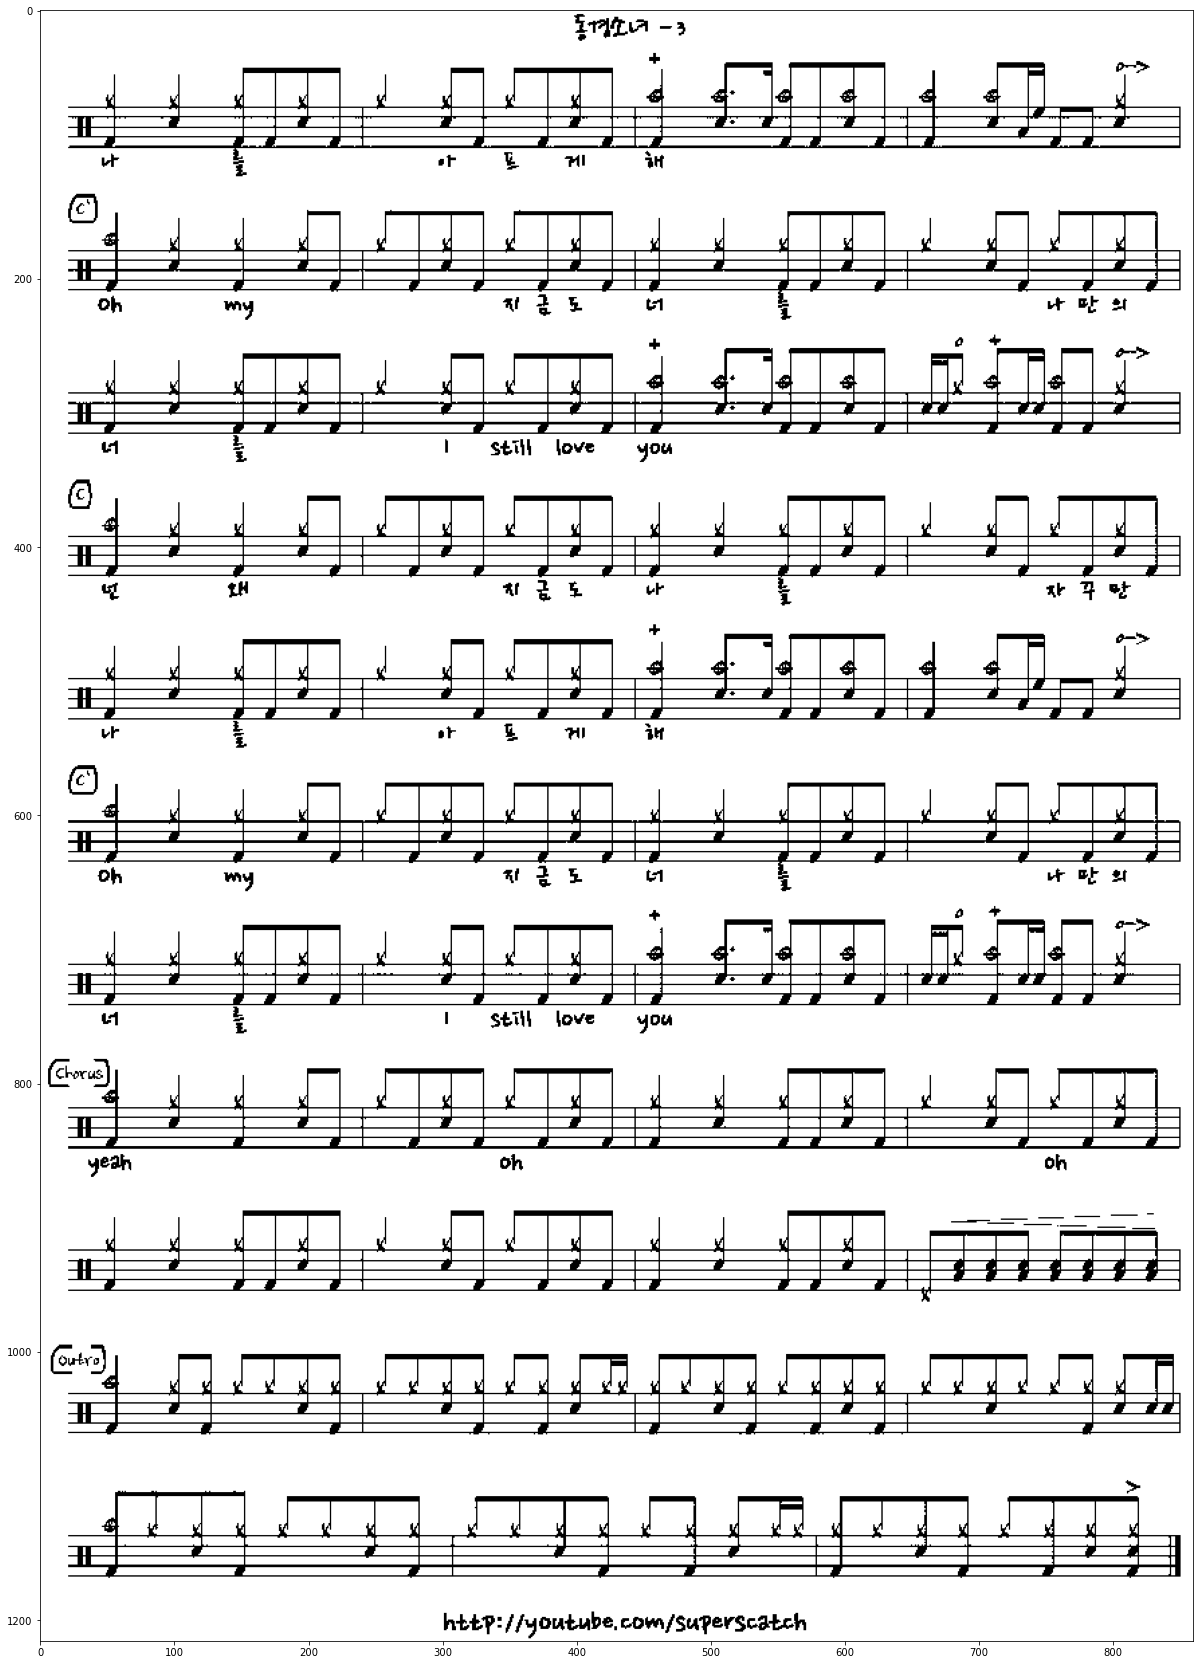

In [241]:
plt.figure(figsize=[50,30])
plt.imshow(music_sheet_bi,'gray')

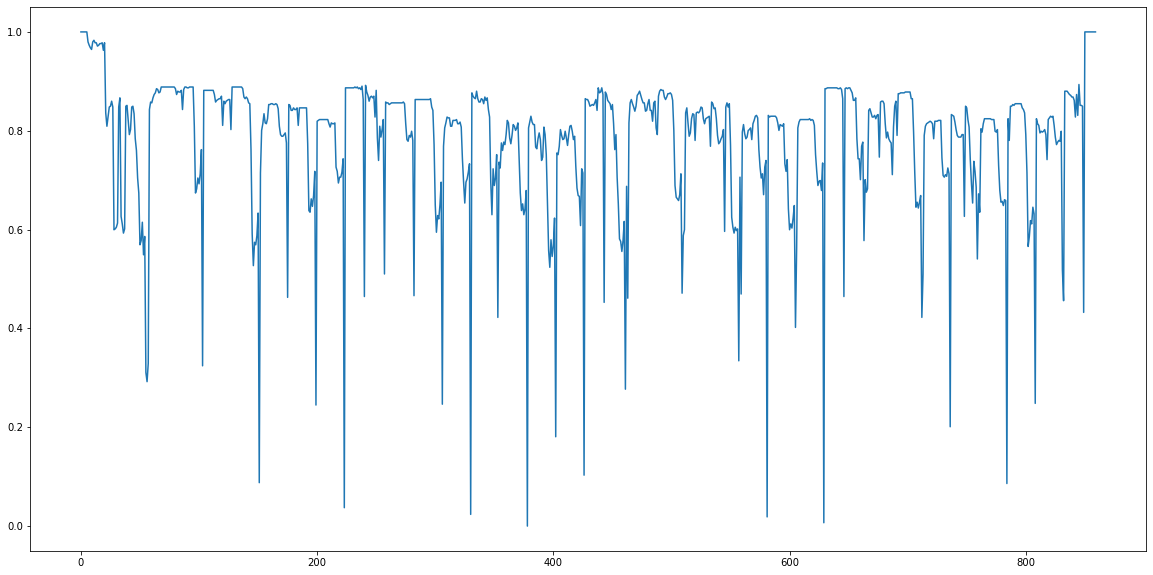

In [242]:
col_hist = np.sum(music_sheet_bi, axis=0)
col_hist = np.float32(col_hist)
col_hist_norm = col_hist.copy()

cv.normalize(col_hist,col_hist_norm,0,1, norm_type=cv.NORM_MINMAX)

plt.figure(figsize=[20,10])
plt.plot(col_hist_norm)

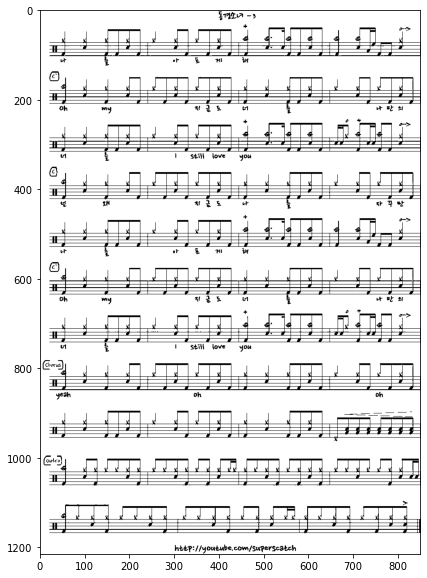

In [243]:
indices = np.where(col_hist_norm >= 1)
indices = indices[0]

for i in range(len(indices)):
    if indices[i+1]-indices[i] > 2:
        #s_index = indices[i]
        e_index = indices[i+1]
        break

music_sheet_bi = music_sheet_bi[0:-1,0:e_index]    
plt.figure(figsize=[20,10])
plt.imshow(music_sheet_bi, cmap='gray')

In [246]:
for i in range(len(indices)):
    if indices[i+1]-indices[i] > 2:
        #s_index = indices[i]
        e_index = indices[i+1]
        break

([<matplotlib.lines.Line2D at 0x1f29116c278>],
 [<matplotlib.lines.Line2D at 0x1f28833acc0>])

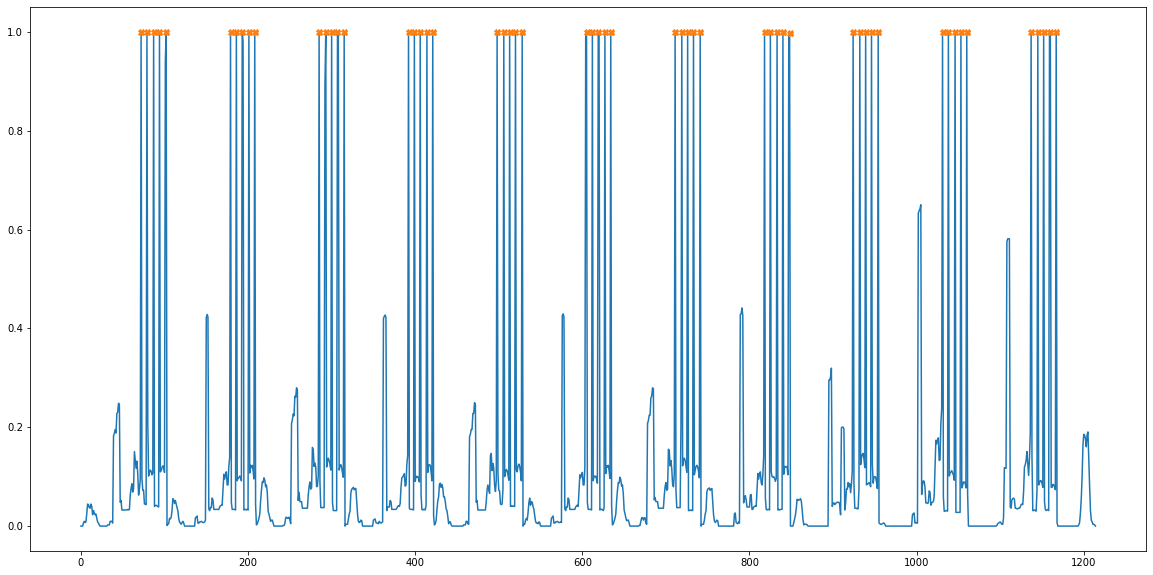

In [247]:
row_hist = np.sum(music_sheet_bi, axis=1)
row_hist = np.float32(row_hist)
row_hist_norm = row_hist.copy()

cv.normalize(row_hist,row_hist_norm,0,1, norm_type=cv.NORM_MINMAX)

row_hist_norm = 1-row_hist_norm
staff,_ = signal.find_peaks(row_hist_norm, height=0.9)

plt.figure(figsize=[20,10])
plt.plot(row_hist_norm),plt.plot(staff,row_hist_norm[staff],"X")

In [248]:
print(staff,"//",staff.shape)

[  72   79   87   94  102  179  186  193  201  208  285  293  300  307
  315  392  399  406  414  421  498  506  513  520  528  605  612  619
  627  634  711  719  726  733  741  818  825  833  840  848  924  932
  939  946  954 1031 1038 1046 1053 1060 1137 1145 1152 1159 1167] // (55,)


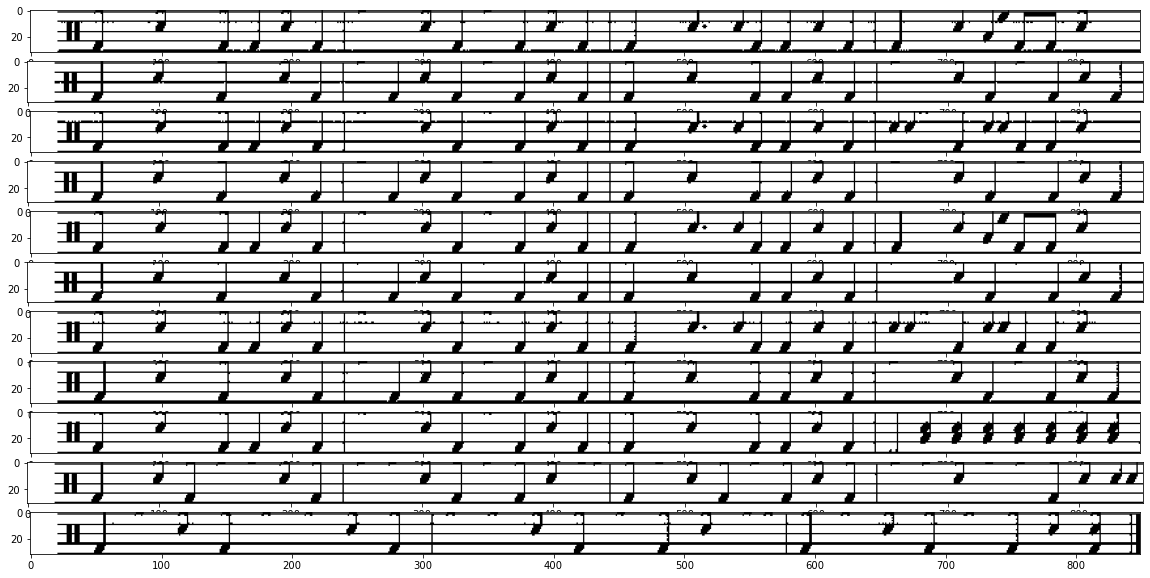

In [249]:
s_staff = []
e_staff = []

for i in range(len(staff)):
    if i%5 == 0:
        s_staff.append(staff[i]-1)
    elif i%5 == 4:
        e_staff.append(staff[i]+1)

staff_crop = []

for j in range(len(staff)//5):
    staff_crop.append(music_sheet_bi[s_staff[j]:e_staff[j],0:-1])
    
plt.figure(figsize=[20,10])
for i in range(len(staff_crop)):
    plt.subplot(11,1,i+1),plt.imshow(staff_crop[i],cmap='gray')